# 🎧 Audio File Exploration

This file is meant to get a better understanding of **audio files** and their **properties**, such as:
- Sampling rate
- Bit depth
- Channels
- Duration
- Waveform and frequency content

We'll explore these using Python libraries like `librosa`, `scipy`, and `matplotlib` to visualize and analyze the sound data.


In [30]:
import librosa
import scipy
import matplotlib.pyplot as plt
import soundfile as sf
import os 

## Get audio sample

In [2]:
AUDIO_FILE_PATH = r"D:\Nsynth dataset\batch\train\audio\bass_acoustic_000-038-127.wav"


In [11]:
y, sr = librosa.load(AUDIO_FILE_PATH, sr=None)
print(f"Sample rate: {sr}")
print(f"Duration: {len(y)/sr:.2f} seconds")
print(f"Number of samples: {len(y)}")
print(f"First 10 samples: {y[:10]}")

Sample rate: 16000
Duration: 4.00 seconds
Number of samples: 64000
First 10 samples: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


## Analysing waveform with Amplitude and sample rate

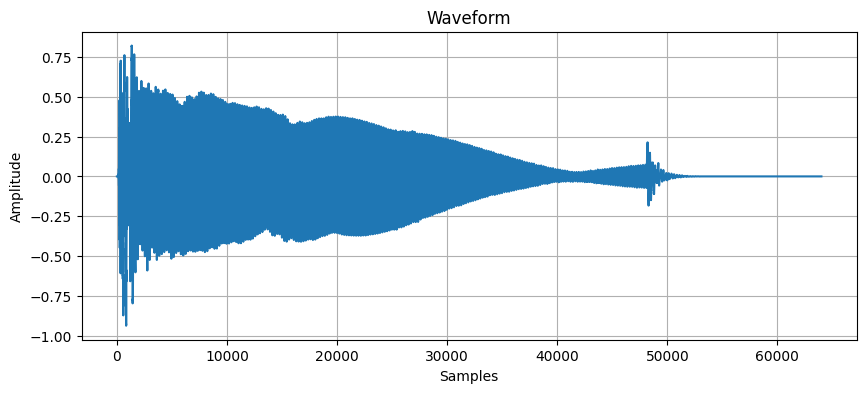

In [24]:
# Waveform of Amplitude over the samples
plt.figure(figsize=(10, 4))
plt.plot(y)
plt.title("Waveform")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

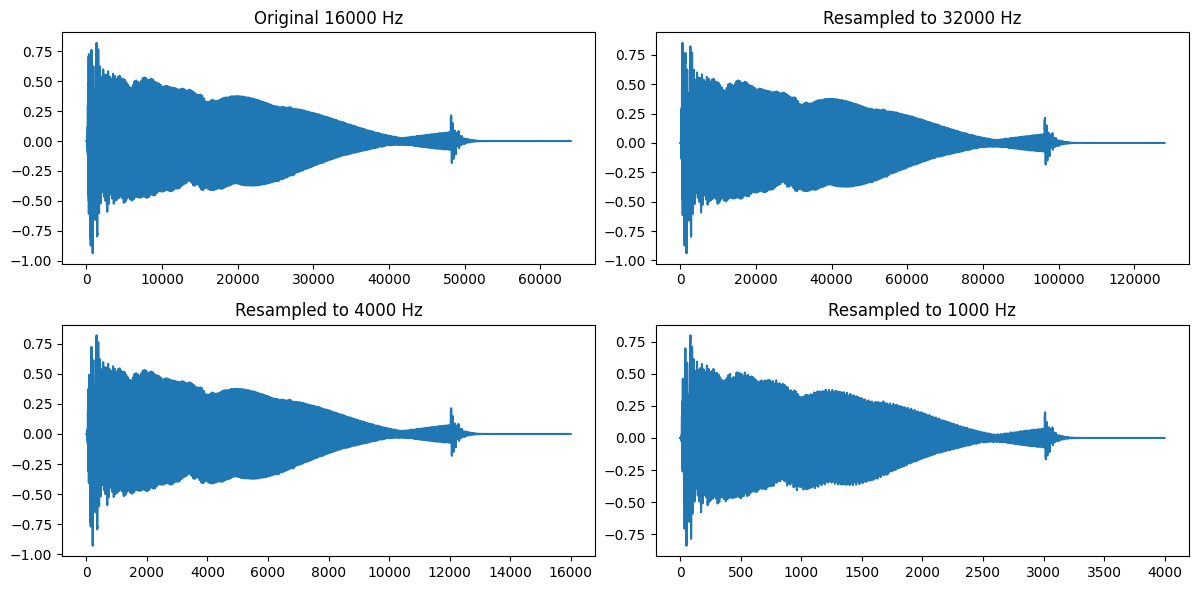

In [25]:
# What if we change the sr rate
y_16000, sr_16000 = librosa.load(AUDIO_FILE_PATH, sr=None) # Original sample rate
y_32000, sr_32000 = librosa.load(AUDIO_FILE_PATH, sr=32000) # 32000 Hz
y_4000, sr_4000 = librosa.load(AUDIO_FILE_PATH, sr=4000) # 4000 Hz
y_1000, sr_1000 = librosa.load(AUDIO_FILE_PATH, sr=1000) # 1000 Hz


fig, axs = plt.subplots(2, 2, figsize=(12, 6))

# Plot each resampled waveform
axs[0, 0].plot(y_16000)
axs[0, 0].set_title("Original 16000 Hz")

axs[0, 1].plot(y_32000)
axs[0, 1].set_title("Resampled to 32000 Hz")

axs[1, 0].plot(y_4000)
axs[1, 0].set_title("Resampled to 4000 Hz")

axs[1, 1].plot(y_1000)
axs[1, 1].set_title("Resampled to 1000 Hz")

# Optional: Tight layout for better spacing
plt.tight_layout()
plt.show()


# Can see sampling rate does not change proportions but changes resulotion, by default Nsynth dataset has resolution of 16kHz


## 🎚️ What is Bit Depth?

**Bit depth** refers to the number of bits used to represent each individual audio sample's amplitude in a digital audio file.  
It determines the **precision of the amplitude values** — in other words, how accurately loudness can be captured and stored.

In [43]:
#Bit depth is 16, so 16 bits per sample(Amplitude)

info = sf.info(AUDIO_FILE_PATH)



D:\Nsynth dataset\batch\train\audio\bass_acoustic_000-038-127.wav
samplerate: 16000 Hz
channels: 1
duration: 4.000 s
format: WAV (Microsoft) [WAV]
subtype: Signed 16 bit PCM [PCM_16]

In [41]:
FOLDER_PATH = r"D:\Nsynth dataset\batch\train\audio"

#Data quality check to ensure all audio files have same bit depth of 16
def check_bit_depth(folder_path):
    for file in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file)
        info = sf.info(file_path)
        if info.subtype != "PCM_16":
            print(f"File {file} has bit depth {info.subtype}")
            return "Inconsistent bit depth"
    
    print("All files have bit depth of 16")

check_bit_depth(FOLDER_PATH)
    


All files have bit depth of 16


## 🎚️ Understanding Audio Channels

**Channels** refer to the number of independent audio signals in a sound file. Each channel represents one stream of audio, and multiple channels are used to create a sense of space or directionality in sound.

### 🎧 Common Types of Channels

| Channels | Type     | Description                                  |
|----------|----------|----------------------------------------------|
| `1`      | **Mono** | A single channel — same sound in both ears   |
| `2`      | **Stereo** | Two channels — left and right               |
| `>2`     | Multichannel | Used in surround sound (e.g., 5.1, 7.1) |

---

In [45]:
# For example, this audio file has 1 channel so it is Mono
print(f"Channels: {info.channels}")

Channels: 1


In [ ]:
#Quality check to ensure all audio files have 1 channel
def check_audio_channels(folder_path):
    for file in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file)
        info = sf.info(file_path)
        if info.channels != 1:
            print(f"File {file} has bit depth {info.channels}")
            return "Inconsistent no. of channels"
    
    print("All files have 1 channel")


check_audio_channels(FOLDER_PATH)
    

All files have 1 channel


## Audio Duration

**Audio duration** refers to the **length of time** an audio file plays, typically measured in **seconds**.

---

In [50]:
print(f"Duration: {info.duration}s")

Duration: 4.0s


In [52]:
def check_duration(folder_path):
    for file in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file)
        info = sf.info(file_path)
        if info.duration != 4: # By default Nsynth dataset has duration of 4 seconds
            print(f"File {file} has duration {info.duration}")
            return "Inconsistent duration"
    
    print("All files are 4 seconds long")


check_duration(FOLDER_PATH)

All files are 4 seconds long


## 🎛️ Spectral Feature Representations (SFT) in GANSynth

Unlike autoregressive models like WaveNet that generate audio sample-by-sample in the time domain, **GANSynth** takes a different approach:

> Instead of generating raw waveforms, GANSynth generates **spectral representations** — specifically **log-magnitude** and **instantaneous frequency (IF)** spectrograms.

---

### 🧠 What Is a Spectral Representation?

Spectral representations are time-frequency transformations of audio (typically via Short-Time Fourier Transform, or STFT). They show:
- **What frequencies** are present
- **When** they occur

---

### 🧠 What Is Instantaneous Frequency (IF)?

- **IF** captures how the phase of each frequency component changes over time
- This preserves **phase coherence**, which is often lost in other representations (like using only magnitude)
- IF makes reconstruction more accurate and avoids phase artifacts

---

### ✅ Why Use SFT (Spectral Feature Transform)?

- **More stable** for the GAN to learn compared to raw waveforms
- **Log-magnitude spectrograms** have smoother structures, making them easier for the generator to model
- **Instantaneous frequency** helps maintain natural-sounding transients and timbral detail
- Avoids issues with traditional phase reconstruction methods (e.g., Griffin-Lim)

---

### 🎯 Summary

> GANSynth uses **Spectral Feature Transformations (SFT)** — combining log-magnitude spectrograms and instantaneous frequency — as a more GAN-friendly and phase-aware alternative to generating raw audio.



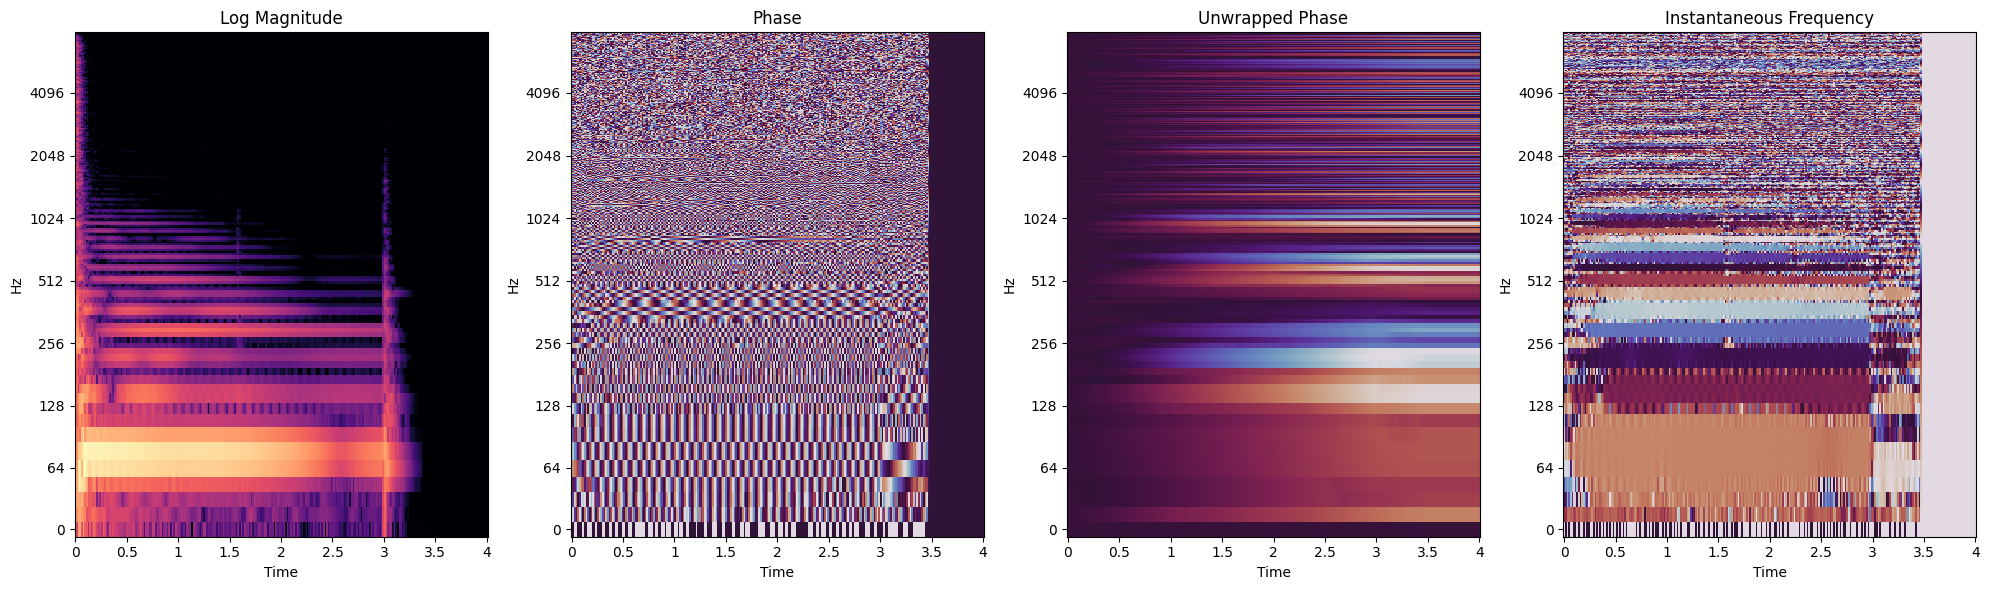

In [56]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

# Load audio file
y, sr = librosa.load(AUDIO_FILE_PATH, sr=None)

# Compute STFT
S_complex = librosa.stft(y, n_fft=1024, hop_length=256)
magnitude, phase = np.abs(S_complex), np.angle(S_complex)

# Unwrapped phase
unwrapped_phase = np.unwrap(phase, axis=1)

# Instantaneous frequency
inst_freq = np.diff(unwrapped_phase, axis=1) * sr / (2 * np.pi * 256)  # hop_length = 256
# Pad to keep same shape
inst_freq = np.pad(inst_freq, ((0, 0), (0, 1)), mode='edge')

# Plot all together
fig, axs = plt.subplots(1, 4, figsize=(20, 6))

librosa.display.specshow(librosa.amplitude_to_db(magnitude, ref=np.max), 
                         sr=sr, hop_length=256, y_axis='log', x_axis='time', ax=axs[0])
axs[0].set_title("Log Magnitude")

librosa.display.specshow(phase, sr=sr, hop_length=256, y_axis='log', x_axis='time', ax=axs[1], cmap='twilight')
axs[1].set_title("Phase")

librosa.display.specshow(unwrapped_phase, sr=sr, hop_length=256, y_axis='log', x_axis='time', ax=axs[2], cmap='twilight')
axs[2].set_title("Unwrapped Phase")

librosa.display.specshow(inst_freq, sr=sr, hop_length=256, y_axis='log', x_axis='time', ax=axs[3], cmap='twilight_shifted')
axs[3].set_title("Instantaneous Frequency")

plt.tight_layout()
plt.show()
